In [129]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'Mall_Customers.csv')
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
113,114,Male,19,64,46
189,190,Female,36,103,85
28,29,Female,40,29,31
79,80,Female,49,54,42
158,159,Male,34,78,1
105,106,Female,21,62,42
1,2,Male,21,15,81
39,40,Female,20,37,75
132,133,Female,25,72,34
81,82,Male,38,54,55


In [130]:


df = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
df.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


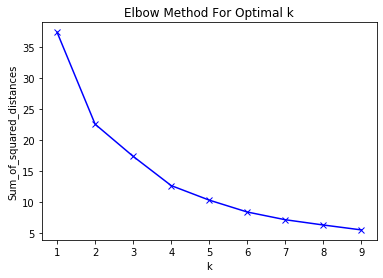

In [131]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

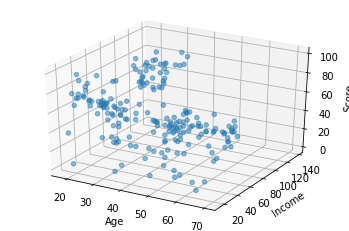

In [132]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha = 0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')
plt.show()

In [133]:
# Number of clusters
k = 4
# Number of training data
n = df.shape[0]
# Number of features in the data
c = df.shape[1]

mean = np.mean(df, axis = 0)
#print(mean)
std = np.std(df, axis = 0)
#print(std)
centroids = []
centroids = {
    i+1: [np.random.randint(18,80), np.random.randint(10,150), np.random.randint(1,100)]
    for i in range(k)
}
for i in centroids.keys():
    print('Initial Centroid of Cluster {}:'.format(i),centroids[i])

Initial Centroid of Cluster 1: [36, 69, 62]
Initial Centroid of Cluster 2: [53, 120, 91]
Initial Centroid of Cluster 3: [20, 39, 21]
Initial Centroid of Cluster 4: [37, 83, 64]


In [134]:
from mpl_toolkits import mplot3d
colmap = {1: 'r', 2: 'b', 3: 'y', 4:'k'}

def plotfunc(df):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    plt.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],color=df['color'], alpha=0.3, edgecolor='k',marker='^')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color= colmap[i])
    plt.xlim(18,70)
    plt.ylim(0,180)
    ax.set_xlabel('Age')
    ax.set_ylabel('Income')
    ax.set_zlabel('Score')
    plt.show()


In [135]:
def allocation(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt((df['Age'] - centroids[i][0]) ** 2 + (df['Annual Income (k$)'] - centroids[i][1]) ** 2
                + (df['Spending Score (1-100)'] - centroids[i][2]) ** 2))
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
    #df.head()

df = allocation(df, centroids)
#print(df.head())

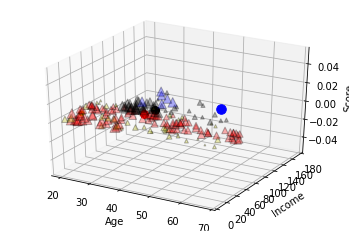

In [136]:
#df.describe()
plotfunc(df)

In [137]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.around(np.mean(df[df['closest'] == i]['Age']))
        centroids[i][1] = np.around(np.mean(df[df['closest'] == i]['Annual Income (k$)']))
        centroids[i][2] = np.around(np.mean(df[df['closest'] == i]['Spending Score (1-100)']))
    return k

centroids = update(centroids)

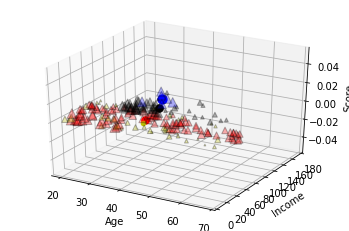

In [138]:
plotfunc(df)

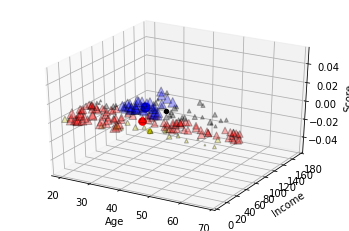

In [139]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = allocation(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
plotfunc(df)

In [140]:
for i in range(k):
    print('Number of points in Cluster {}:'.format(i+1),sum(df.closest==(i+1)))


Number of points in Cluster 1: 100
Number of points in Cluster 2: 39
Number of points in Cluster 3: 23
Number of points in Cluster 4: 38


In [141]:
for i in centroids.keys():
    print('Final Centroid of Cluster {}:'.format(i),centroids[i])

Final Centroid of Cluster 1: [39.0, 48.0, 56.0]
Final Centroid of Cluster 2: [33.0, 87.0, 82.0]
Final Centroid of Cluster 3: [45.0, 26.0, 21.0]
Final Centroid of Cluster 4: [40.0, 87.0, 19.0]


In [142]:
for i in centroids.keys():
    print('Initial Centroid of Cluster {}:'.format(i),old_centroids[i])

Initial Centroid of Cluster 1: [36, 69, 62]
Initial Centroid of Cluster 2: [53, 120, 91]
Initial Centroid of Cluster 3: [20, 39, 21]
Initial Centroid of Cluster 4: [37, 83, 64]
